In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import math
from sklearn.inspection import permutation_importance


In [198]:
pd.set_option('display.max_columns', None)

### Import Data

In [199]:
X_train = pd.read_csv('../data/train_other.csv').set_index('Id').drop(1299)
X_test = pd.read_csv('../data/test_other.csv').set_index('Id')
X_Ktest = pd.read_csv('../data/Ktest_other.csv').set_index('Id')

In [200]:
y_train = pd.read_csv('../data/Model Train.csv').set_index('Id').drop(1299)['SalePrice']
y_test = pd.read_csv('../data/Model Test.csv')['SalePrice']
y_train = np.log(y_train)
y_test = np.log(y_test)
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

# Lasso

In [201]:
lasso = Lasso(max_iter=10000)

alpha = 10**np.linspace(-4,-3,50)

params = {'alpha': alpha}
grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
grid_search_lasso.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001    , 0.00010481, 0.00010985, 0.00011514, 0.00012068,
       0.00012649, 0.0001325...
       0.00032375, 0.00033932, 0.00035565, 0.00037276, 0.00039069,
       0.00040949, 0.00042919, 0.00044984, 0.00047149, 0.00049417,
       0.00051795, 0.00054287, 0.00056899, 0.00059636, 0.00062506,
       0.00065513, 0.00068665, 0.00071969, 0.00075431, 0.0007906 ,
       0.00082864, 0.00086851, 0.0009103 , 0.0009541 , 0.001     ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [202]:
print(grid_search_lasso.best_params_)
rss = np.sum((y_train-grid_search_lasso.predict(X_train))**2)
print('Training Error: ',math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_lasso.predict(X_test))**2)
print('Test Error: ',math.sqrt(rss/X_test.shape[0]))

{'alpha': 0.00042919342601287783}
Training Error:  0.09718986255992813
Test Error:  0.1289248984700277


In [203]:
lasso = Lasso(max_iter=10000,alpha = 0.00042919342601287783 )
lasso.fit(X,y)

Lasso(alpha=0.00042919342601287783, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
y_Ktest = lasso.predict(X_Ktest)
lasso_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
lasso_submission.to_csv('../submission/lasso.csv',index=False)


In [206]:
for i in range(len(impt_lasso.importances)):
    print(impt_lasso.importances_mean[i],X.columns[i])

2.5161924605654473e-05 OverallQual
0.0019902555730273554 OverallCond
0.000511747241491467 AgeBuilt
0.00985951724852957 AgeRemodAdd
0.0 ExterQual
0.0 ExterCond
4.754410950067456e-05 BsmtQual
9.358360579214686e-06 BsmtCond
0.00012892441355289997 BsmtExposure
0.0 BsmtFinType1
0.0 BsmtFinType2
1.6510136888148175e-05 HeatingQC
0.00012847489036748038 BsmtBath
0.0 Bath
0.0 BedroomAbvGr
0.00015741993675199016 KitchenAbvGr
0.0008142176913591203 KitchenQual
0.0 TotRmsAbvGrd
0.00014429315978774503 Functional
6.127555934266615e-05 Fireplaces
0.0 FireplaceQu
0.0 GarageFinish
0.0 GarageCars
0.0 GarageQual
0.002860682869935427 GarageCond
0.0016033147960213157 PoolQC
0.004773114813976087 LotArea
0.004013696754470442 MasVnrArea
0.00022255735353753358 BsmtFinSF1
0.00011629911253149272 BsmtFinSF2
0.0 BsmtUnfSF
0.0005935687240028242 TotalBsmtSF
2.5100444266790145e-05 1stFlrSF
3.136559620942059e-06 2ndFlrSF
0.0005680848780400094 LowQualFinSF
0.0015394714750402883 GrLivArea
0.0 GarageArea
0.0 WoodDeckSF
0.0

['importances', 'importances_mean', 'importances_std']


{'whiskers': [<matplotlib.lines.Line2D at 0x1244f0d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1244f57d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1244f00d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1244f0dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1244fc750>,
 'means': []}

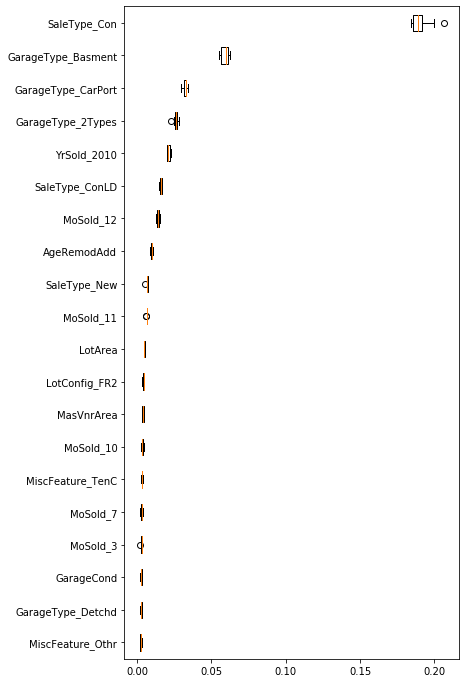

In [205]:
impt_lasso = permutation_importance(lasso, X, y, n_repeats=10,
                                random_state=42)
print(dir(impt_lasso))
perm_sorted_idx = impt_lasso.importances_mean.argsort()[-20:]
plt.figure(figsize=(6,12))
plt.boxplot(impt_lasso.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])

{'whiskers': [<matplotlib.lines.Line2D at 0x1180816d0>,
 'caps': [<matplotlib.lines.Line2D at 0x118078a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x118078a10>,
 'medians': [<matplotlib.lines.Line2D at 0x118086bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x118081cd0>,
 'means': []}

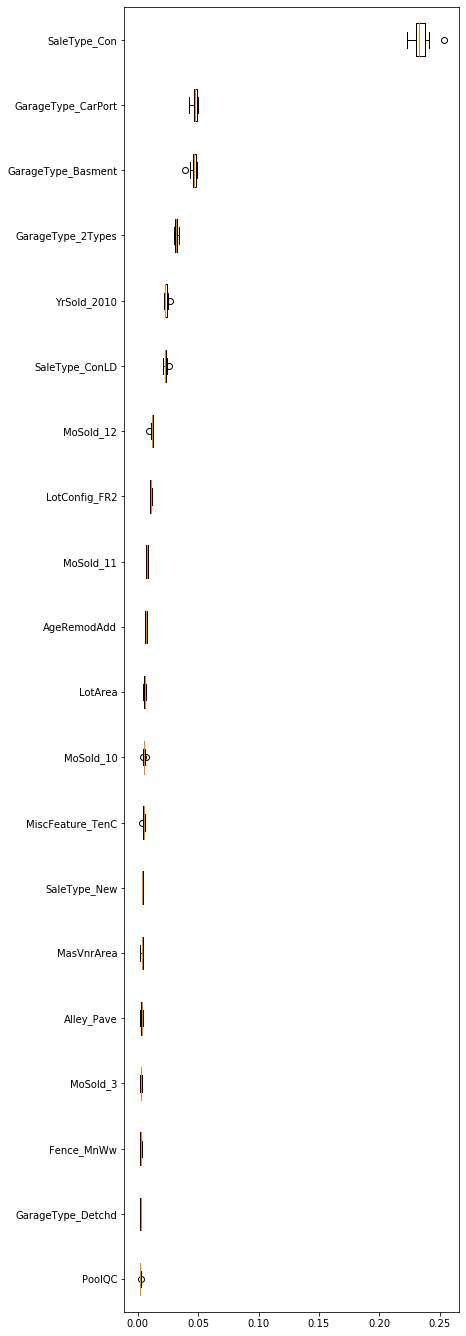

In [195]:
impt_lasso = permutation_importance(grid_search_lasso, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = impt_lasso.importances_mean.argsort()[-20:]
plt.figure(figsize=(6,24))
plt.boxplot(impt_lasso.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
# plt.savefig('../fig/lasso_top20.png')

# Feature Selection With Lasso

In [219]:
selected_lasso = X.columns[lasso.coef_ != 0]

In [237]:
selected_lasso

Index(['OverallQual', 'OverallCond', 'AgeBuilt', 'AgeRemodAdd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'HeatingQC', 'BsmtBath', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageCond', 'PoolQC',
       'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MiscVal',
       'MSSubClass_PUD', 'MSZoning_RH', 'Alley_Pave', 'LotShape_IR3',
       'LotConfig_FR2', 'Neighborhood_Timber', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'Neighborhood_OldTown', 'Neighborhood_NoRidge',
       'Neighborhood_Blueste', 'Neighborhood_Veenker', 'Condition1_PosN',
       'Condition1_RRNn', 'Condition2_Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'RoofStyle_Gambrel', 'RoofStyle_Mansard',
       'RoofStyle_Flat', 'RoofMatl_WdShngl', 'RoofMatl_Roll',
       'Exterior1st_MetalSd', 'Exterior1st_AsbShng', 'Exterior1st_CBlock',
       'Exterior2nd_MetalSd', 'Exterior2nd_CmentBd', 'Exterior2n

In [221]:
X_train_selected = X_train[selected_lasso]
X_test_selected = X_test[selected_lasso]
X_selected = X[selected_lasso]

lm = LinearRegression()
lm.fit(X_train_selected,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
X_train_selected

,OverallQual,OverallCond,AgeBuilt,AgeRemodAdd,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageCond,PoolQC,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,MiscVal,MSSubClass_PUD,MSZoning_RH,Alley_Pave,LotShape_IR3,LotConfig_FR2,Neighborhood_Timber,Neighborhood_Sawyer,Neighborhood_StoneBr,Neighborhood_OldTown,Neighborhood_NoRidge,Neighborhood_Blueste,Neighborhood_Veenker,Condition1_PosN,Condition1_RRNn,Condition2_Artery,BldgType_2fmCon,BldgType_Duplex,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Flat,RoofMatl_WdShngl,RoofMatl_Roll,Exterior1st_MetalSd,Exterior1st_AsbShng,Exterior1st_CBlock,Exterior2nd_MetalSd,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_BrkFace,Exterior2nd_Brk Cmn,Foundation_Slab,Foundation_Stone,Heating_GasW,Heating_Wall,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_2Types,GarageType_CarPort,PavedDrive_N,PavedDrive_P,Fence_MnPrv,Fence_GdPrv,Fence_GdWo,Fence_MnWw,MiscFeature_Shed,MiscFeature_Othr,MiscFeature_TenC,MoSold_7,MoSold_5,MoSold_10,MoSold_3,MoSold_9,MoSold_11,MoSold_8,MoSold_4,MoSold_2,MoSold_12,MoSold_1,YrSold_2006,YrSold_2010,SaleType_New,SaleType_COD,SaleType_ConLI,SaleType_ConLD,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleCondition_Partial,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_AdjLand,LotFrontage
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
134,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.376896,-0.520013,-0.947332,-0.770140,1.054403,-0.25651,1.706176,0.127441,-0.597713,1.148813,0.893604,1.033822,0.389701,-1.067877,-0.224935,0.736736,-0.332538,-0.233401,-0.950249,-1.007970,1.447097,0.301892,0.272773,-0.056044,-0.546584,0.887227,-0.354558,0.165775,0.453749,0.486052,-0.140574,-0.319935,0.238269,1.081864,0.063557,-0.188823,-0.239503
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.376896,-0.520013,-1.208781,-1.109016,1.054403,-0.25651,0.582831,0.127441,1.271440,-1.221045,0.893604,-0.902833,1.181302,0.163397,-0.224935,0.736736,0.924433,-0.233401,0.615183,1.185433,0.329234,0.301892,1.657986,-0.056044,1.066320,-1.428704,-0.354558,0.512995,0.037033,-0.088403,-0.140574,0.871245,0.494803,-0.941730,0.376874,-0.188823,1.701810
25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.795388,2.195526,0.163825,-0.673318,-0.694947,2.62429,-0.540514,0.127441,0.336863,-0.273102,0.893604,1.033822,-1.193502,0.163397,-0.224935,0.736736,-0.332538,-0.233401,0.615183,0.637082,-0.788630,-1.038829,0.272773,-0.056044,-0.184069,0.327152,3.148776,0.096850,-0.005082,-0.144096,-0.140574,-0.929949,-0.142424,1.368761,0.629832,-0.188823,0.103280
1094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.795388,2.195526,0.131144,-0.721729,-0.694947,-0.25651,-0.540514,0.127441,0.336863,1.148813,-0.138769,1.033822,-0.401900,-2.299151,-0.224935,0.736736,-0.332538,-0.233401,-0.950249,-1.007970,-0.788630,0.301892,0.272773,-0.056044,0.036781,0.747050,-0.354558,0.095471,-0.439531,0.244791,-0.140574,-0.553488,0.669561,-0.941730,0.477739,-0.188823,0.207530
1289,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [222]:
rss = np.sum((y_train-lm.predict(X_train_selected))**2)
print('Training Error: ',math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-lm.predict(X_test_selected))**2)
print('Test Error: ',math.sqrt(rss/X_test.shape[0]))

Training Error:  0.09415884419329765
Test Error:  0.13908734821786622


In [223]:
lm.fit(X_selected,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [225]:
impt_lm = permutation_importance(lm, X_test_selected, y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = impt_lm.importances_mean.argsort()
# plt.figure(figsize=(6,12))
# plt.boxplot(impt_lm.importances[perm_sorted_idx].T, vert=False,
#             labels=X_selected.columns[perm_sorted_idx])
# # plt.savefig('../fig/lasso_top20.png')

In [226]:
col_dict = {}
for col in selected_lasso:
    if col.split('_')[0] in col_dict:
        col_dict[col.split('_')[0]].append(col)
    else:
        col_dict[col.split('_')[0]] = [col]

In [227]:
import math

selected_features = list(col_dict.keys())
feature_imp = []
feature_imp_std = []
for feature in selected_features:
    mean_list = []
    var_list = []
    for sub_cat in col_dict[feature]:
        loc = selected_lasso.get_loc(sub_cat)
        mean_list.append(impt_lm.importances_mean[loc])
        var_list.append(impt_lm.importances_std[loc]**2)
    feature_imp.append(sum(mean_list))
    feature_imp_std.append(math.sqrt(sum(var_list)))
        

In [228]:
df_imp = pd.DataFrame({'Feature':selected_features,
                       'Importance':feature_imp,
                       'STD':feature_imp_std})

In [229]:
df_imp = df_imp.sort_values(by='Importance',ascending=False)

The result doesn't make sense. It may not be a good indicator for feature importances. Maybe because a lot of the features are heavily skewed?

In [232]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train_selected)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:42:03   Log-Likelihood:                 1101.5
No. Observations:                1167   AIC:                            -2005.
Df Residuals:                    1068   BIC:                            -1504.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.03

# Ridge

In [69]:
ridge = Ridge(max_iter=10000)

alpha = 10**np.linspace(0.5,1.5,50)

params = {'alpha': alpha}
grid_search_ridge = GridSearchCV( estimator=ridge, param_grid=params )
grid_search_ridge.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 3.16227766,  3.31442475,  3.47389211,  3.64103195,  3.81621341,
        3.9998234 ,  4.19226744,  4.39397056,  4.60537826,  4.82695744,
        5.05919749,  5.3026...
       10.23773966, 10.73030941, 11.24657822, 11.78768635, 12.35482888,
       12.94925842, 13.57228783, 14.22529313, 14.90971657, 15.62706977,
       16.37893707, 17.16697907, 17.99293623, 18.85863279, 19.76598072,
       20.716984  , 21.71374303, 22.75845926, 23.85344006, 25.00110383,
       26.20398529, 27.46474115, 28.78615592, 30.17114811, 31.6227766 ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
print(grid_search_ridge.best_params_)
rss = np.sum((y_train-grid_search_ridge.predict(X_train))**2)
print('Training Error: ',math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_ridge.predict(X_test))**2)
print('Test Error: ',math.sqrt(rss/X_test.shape[0]))

{'alpha': 10.73030940526156}
Training Error:  0.10023104672889535
Test Error:  0.12564839953740853


In [73]:
ridge = Ridge(max_iter=10000,alpha = 10.73030940526156 )
ridge.fit(X,y)

Ridge(alpha=10.73030940526156, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
y_Ktest = ridge.predict(X_Ktest)
ridge_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
ridge_submission.to_csv('../submission/ridge.csv',index=False)

# Elastic Net

In [75]:
elastic = ElasticNet(max_iter=10000)

alpha = np.linspace(0.0001,0.001,20)
l1_ratio = np.linspace(0.8,0.999,20)

params = {'alpha': alpha,'l1_ratio':l1_ratio}
grid_search_elastic = GridSearchCV( estimator=elastic, param_grid=params )
grid_search_elastic.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001    , 0.00014737, 0.00019474, 0.00024211, 0.00028947,
       0....
       0.00081053, 0.00085789, 0.00090526, 0.00095263, 0.001     ]),
                         'l1_ratio': array([0.8       , 0.81047368, 0.82094737, 0.83142105, 0.84189474,
       0.85236842, 0.86284211, 0.87331579, 0.88378947, 0.89426316,
       0.90473684, 0.91521053, 0.92568421, 0.93615789, 0.94663158,
       0.95710526, 0.96757895, 0.97805263, 0.98852632, 0.999     ])},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [76]:
grid_search_elastic.best_params_

{'alpha': 0.0004315789473684211, 'l1_ratio': 0.999}

# Polynomial

In [47]:
num_cols = X_train.columns[X_train.apply(lambda col: col.nunique()) > 2]
poly_names = np.hstack((num_cols.map(lambda name: name+'^2'),
                        num_cols.map(lambda name: name+'^3')))

In [49]:
def add_poly(df):
    df_temp = df.copy()
    num_square = df_temp[num_cols].apply(lambda col: np.power(col,2))
    num_cube = df_temp[num_cols].apply(lambda col: np.power(col,3))
    poly = pd.concat([num_square,num_cube],axis=1)
    return(poly)

In [50]:
X_train_poly = add_poly(X_train)
X_test_poly = add_poly(X_test)
X_Ktest_poly = add_poly(X_Ktest)

In [52]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl = scl.fit(X_train_poly)

In [53]:
X_train_poly = pd.DataFrame(scl.transform(X_train_poly),columns=poly_names)
X_test_poly = pd.DataFrame(scl.transform(X_test_poly),columns=poly_names)
X_Ktest_poly = pd.DataFrame(scl.transform(X_Ktest_poly),columns=poly_names)

In [54]:
X_train_poly = pd.concat([X_train.reset_index(),X_train_poly],axis=1).set_index('Id')
X_test_poly = pd.concat([X_test.reset_index(),X_test_poly],axis=1).set_index('Id')
X_Ktest_poly = pd.concat([X_Ktest.reset_index(),X_Ktest_poly],axis=1).set_index('Id')

# Polynomial with Lasso

In [57]:
lasso_poly = Lasso(max_iter=10000)

alpha = 10**np.linspace(-4,-3,50)
params = {'alpha': alpha}
grid_search_lasso_poly= GridSearchCV( estimator=lasso_poly, param_grid=params )
grid_search_lasso_poly.fit(X_train_poly,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001    , 0.00010481, 0.00010985, 0.00011514, 0.00012068,
       0.00012649, 0.0001325...
       0.00032375, 0.00033932, 0.00035565, 0.00037276, 0.00039069,
       0.00040949, 0.00042919, 0.00044984, 0.00047149, 0.00049417,
       0.00051795, 0.00054287, 0.00056899, 0.00059636, 0.00062506,
       0.00065513, 0.00068665, 0.00071969, 0.00075431, 0.0007906 ,
       0.00082864, 0.00086851, 0.0009103 , 0.0009541 , 0.001     ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
print(grid_search_lasso_poly.best_params_)
rss = np.sum((y_train-grid_search_lasso_poly.predict(X_train_poly))**2)
print('Training Error: ',math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_lasso_poly.predict(X_test_poly))**2)
print('Test Error: ',math.sqrt(rss/X_test.shape[0]))

{'alpha': 0.00032374575428176434}
Training Error:  0.08941371846499675
Test Error:  0.13188860283176362


In [60]:
lasso_poly = Lasso(max_iter=10000,alpha = 0.00032374575428176434 )
lasso_poly.fit(X,y)

Lasso(alpha=0.00032374575428176434, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
y_Ktest = lasso_poly.predict(X_Ktest)
lasso_poly_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
lasso_poly_submission.to_csv('../submission/lasso_poly.csv',index=False)

# Feature Selection With Lasso in Polynomial Regression

In [93]:
selected_lasso_poly = X.columns[lasso_poly.coef_ > 0]

In [96]:
selected_lasso_poly

Index(['AgeBuilt', 'BsmtQual', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageCond', 'LotArea', 'MasVnrArea', 'LowQualFinSF',
       'GrLivArea', 'MiscVal', 'MSSubClass_PUD', 'Neighborhood_OldTown',
       'Neighborhood_NoRidge', 'Neighborhood_Veenker', 'Condition1_RRNn',
       'BldgType_Duplex', 'RoofStyle_Gambrel', 'RoofMatl_Roll',
       'Exterior1st_CemntBd', 'Exterior1st_AsbShng', 'Exterior2nd_Plywood',
       'Exterior2nd_ImStucc', 'Foundation_Stone', 'Heating_GasW',
       'Heating_Wall', 'GarageType_Basment', 'GarageType_2Types',
       'PavedDrive_P', 'Fence_GdPrv', 'Fence_MnWw', 'MiscFeature_Shed',
       'MiscFeature_Othr', 'MiscFeature_TenC', 'MoSold_7', 'MoSold_3',
       'MoSold_9', 'MoSold_8', 'MoSold_4', 'MoSold_2', 'MoSold_12', 'MoSold_1',
       'YrSold_2006', 'YrSold_2010', 'SaleType_New', 'SaleType_ConLD',
       'SaleType_CWD', 'SaleType_Con', 'SaleCondition_Alloca',
       'SaleCondition_Abnorml', 'LotFrontage'],
      dtype='object')

<font color=green> None </font> of the quadratic or cubic terms is significant.

In [239]:
import math

In [241]:
math.exp(0.0550/)

7.38905609893065